# Project Proposal

For my project, I want to do something dealing with the sport of basketball, specifically
focusing on data for the National Basketball Association. Two broad research
questions I would like to investigate are would include can I predict a player's position based on their statistics? Can I cluster players into positions based on their stats? And will this result in the same, or new positions? I looked online and saw that ESPN and basketball reference are
great places to scrape data that I can use in my project. I took a look at the HTML and
found that much of the game statistics were also stored in <tr> tags, just like what we
did in class. This project is personally interesting to me since I regularly watch the NBA.
Over the last few seasons, I would say there has been an absurd amount of variability
across different aspects of the league, whether it be who breaks out, who wins awards,
or even who wins the championship. There is also a key phrase that has been popping up recently which is "positionless basketball" as the sport develops. Nowawdays we have moved further away from the "traditional" bigman, and have seen a new emergence of players who can stretch the floor, or even playmake with a bigger frame. My project hopes to see if it will be possible to correctly predict a player's position based off their statistics, as well as challenge the ideology of traditional positions, and see if we can build any new position archetypes.

# Description of data sources

I obtained my data by scraping data from basketball reference, specifically from this link https://www.basketball-reference.com/leagues/NBA_2000_per_game.html. The company that owns  the website, Sports Reference, also has various statistic websites for other sports, such as baseball reference, and pro-football reference. They are a common and credible source used by other basketball enthusiasts. I decided to use data from the 1999-2000 season, up until the 2022-2023 seasons.

# Description of the observational units in each of your data files, including some basic information about how the data was collected (which you can cite from your data sources)

In my project, I have one data file. Every observational unit is an NBA player with their in-game statistics, for a season of the NBA. For example, Lebron James will appear more than once in the dataset, but for a unique season. The data provided by basketball reference was obtained by individuals that helped build the site, such as Sean Lahman, a data projects manager. As of the 2018-2019 season, basketball reference's season data is official NBA data, provided by SportRadar, the official statistics partner of the NBA. The data was already sound before, but this allows for more frequent statistical corrections to be made.

# Description of your main variables of interest, including some basic information about how they were measured (which you can cite from your data sources)


My main variables of interest will be in-game statistics that players have recorded over a season. I don't see myself using a player's name or team, but rather to treat every row as an instance of a player. Position will also be crucial in answering my research questions. I also recorded the year of when the statistics were achieved in order to control for year. These statistics were measured throughout a player's season, then combined to calculate averages based on the number of games the player had played. This includes stats such as an points per game, rebounds per game, assists per game, steals per game, blocks per game, etc. I will also be using proportions/percentages, such as FG%, which is calculated by taking FG(field goal)/FGA (field goal attempts). I won't be going in depth about how variables are formulated due to an abundance of sports terminology, but my variables are per game averages over a season. You can find a glossary to the variables here https://www.basketball-reference.com/about/glossary.html.

# Description of any data cleaning/processing you did: explain what, how, and why you did what you did, but do NOT include the code. This includes steps like creating/transforming variables, filtering observational units, joining data sets, filling missing values, recoding categorical data, processing text, etc --- the kinds of data manipulating we have done in the class.

In order to get my data, I looped through the 1999-2000 season to the 2022-2023 season to obtain all the players on basketball reference. The year/season wasn't included in the dataset, however I decided to include it in order to control for the change in statistics over the years, which would control for era. When using read_html, there were some placeholders that I had to filter out since they were just headers of the table. All of the variables in the dataset came as objects, so I had to transform them into what they should be, either an integer or a float. Each player was also recorded for each instance they were on a different team during a season, so I had to filter out those records and just take the average of what they did on however many teams they were on for that season. I also put a 30 minimum games played for a season in order for that season to be recorded, which would get rid of some outliers if they had a good or bad stretch of games. Lastly, some players also had their secondary position listed, so I just mapped them to their primary position. In my machine learning model, I also mapped the positions to be either a guard, forward, or center. I used both in different analyses.

# Most compelling visualizations of the data.

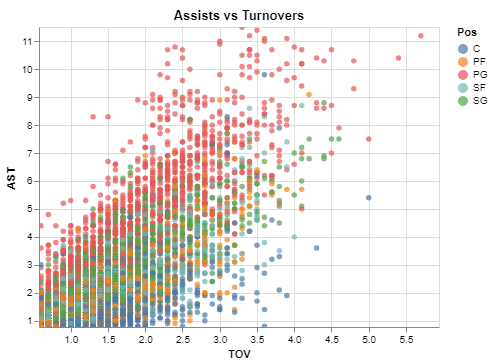

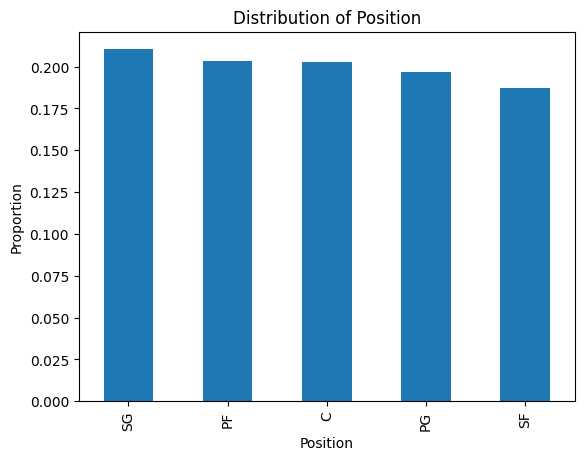

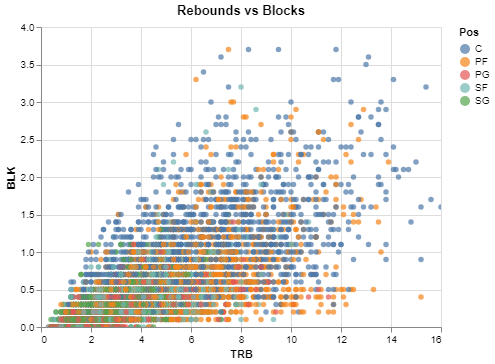

# Highlights of Analyses

# Analysis #1: Can we predict an NBA player's position, based on their statistics? (Classification Problem)

In order to find the best model to answer this question, first I needed to decide what positions I wanted to predict, the traditional five positions, or a broader guard, forward, center positions? I decided to go decided to move on with 5 positions even though we will end up with a higher test error/statistics. This is because this will give us more bins, and overrall more information as a tradeoff to having more error in our model. This would also be more applicable, since it aligns with the NBA today as the league uses five possible positoins to define a player.

In my machine learning notebook, I first tested different sets of features to see which one would give us the lowest f1 scores. For my sets, I went with a variety, such as a set with pure offensive statistics, pure defensive statistics, and a bunch of mixtures. I then found the best k-value that would go with the two best sets of features, leaving me with two models. With these two models, I used ensemble methods to see if I could build an even better model. I used both stacking and voting to build two different ensemble models. I finally came to the best model I could come up with, coded below.

In [ ]:
import pandas as pd
import altair as alt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
alt.data_transformers.disable_max_rows()
url = "https://drive.google.com/file/d/1bWVLFDFM5rQnqNmntrH4gQee_uCNmVU_/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_nba = pd.read_csv(path)
df_nba.drop("Unnamed: 0", axis=1, inplace=True)
df_nba.drop("Rk", axis=1, inplace=True)
df_nba = df_nba.dropna()
def position_to_position(c):
  if c == "PG":
    return "G"
  elif c == "SG":
    return "G"
  elif c == "SF":
    return "F"
  elif c == "PF":
    return "F"
  elif c == "C":
    return "C"
df_nba["Pos_3"] = df_nba["Pos"].map(position_to_position)

In [ ]:
X_train = df_nba[['MP', 'FGA', '3PA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF'] ]
y_train = df_nba["Pos"]
ct = make_column_transformer(
    (StandardScaler(), ['MP', 'FGA', '3PA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']),
    remainder="drop" )
model_1 = make_pipeline(
    ct,
    KNeighborsClassifier(n_neighbors=24))
model_1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['MP', 'FGA', '3PA', 'ORB',
                                                   'DRB', 'TRB', 'AST', 'STL',
                                                   'BLK', 'TOV', 'PF'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=24))])

In [ ]:
precision_macro = cross_val_score(model_1, X_train, y_train, cv=10, scoring="precision_macro").mean()
recall_macro = cross_val_score(model_1, X_train, y_train, cv=10, scoring="recall_macro").mean()
f1score_macro = cross_val_score(model_1, X_train, y_train, cv=10, scoring="f1_macro").mean()
precision_macro, recall_macro, f1score_macro

(0.6535214235451912, 0.6478376050116486, 0.6470421163166068)

In my final model, my features include 'MP', 'FGA', '3PA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', and 'PF'. We use this model to predict the tradition 5 positions in basketball, point guard, shooting guard, small forward, porward forward, and center. Again, I decided to go with five positions instead of three because this gives us more information, and would have a more practical use since this approach aligns more with traditional basketball positions. I chose this model since it gave me the lowest f1 macro score out of all the models I tried out. in this model, we got an a precision macro average of 0.654, meaning 65.4% of observations predicted to be a position that actually were that position. The recall macro average ended up being 0.648, meaning 64.8%  of players actually in a position were predicted to be that position.

# Analysis 2: Can I cluster players into positions based on their stats? And will this result in the same, or new positions?

In my details notebook, I clustered players using features that were linked to offensive statistics, defensive statistics, and a mix of both. Here, I decided to only work with the clustering model with a mix of both offensive and defensive statistics, becuase that makes the most sense for basketball. Unlike football where you have offensive and defensive lineups, a basketball team has to play both ends of the floor, and you can't always just sub players based on the situation. This would be the best way to differentiate players.

This time, I decided to use only 3 clusters and compare the results to 3 positions, guard, forward, and center. Since player roles blur traditional positions more so now than ever, a 3 cluster approach would be better to reflect this versatility of players. Fewer clusterings can also potentially give us clearer and distinct groupings.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
X_train = df_nba[["FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "PTS", "STL","BLK", "TOV", "PF"]]
model = KMeans(n_clusters=3, random_state=4)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
model.fit(X_train_std)
clusters = model.labels_
df_nba["cluster"] = clusters
pd.crosstab(df_nba["Pos_3"], df_nba["cluster"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster,0,1,2
Pos_3,,,
C,472,745,43
F,1919,662,660
G,2296,28,1265


By doing a crosstabulation with our data, we see that we have a cluster consisting of mostly guards and forwards with a good amount centers, a cluster with mostly centers and forwards, and a cluster with mostly guards and a considerable amount of forwards.

**Cluster Zero:**
For the first cluster, I would guess these players have high steals, and maybe three point percentages since it mostly consists of guards and forwards.

**Cluster One:**
My guess would be that the players in the second cluster are definitely traditional "bigmen", since I feel like they would be easier to cluster together based on their more distinct statistics, such as poor three point shooting, higher rebounds, and higher blocks.

**Cluster Two**
 As for the last cluster, I would guess they have high assists, and turnovers.

 Let's take a look into how these players were clustered based on their statistics below, and see if any of my predictions are correct below.

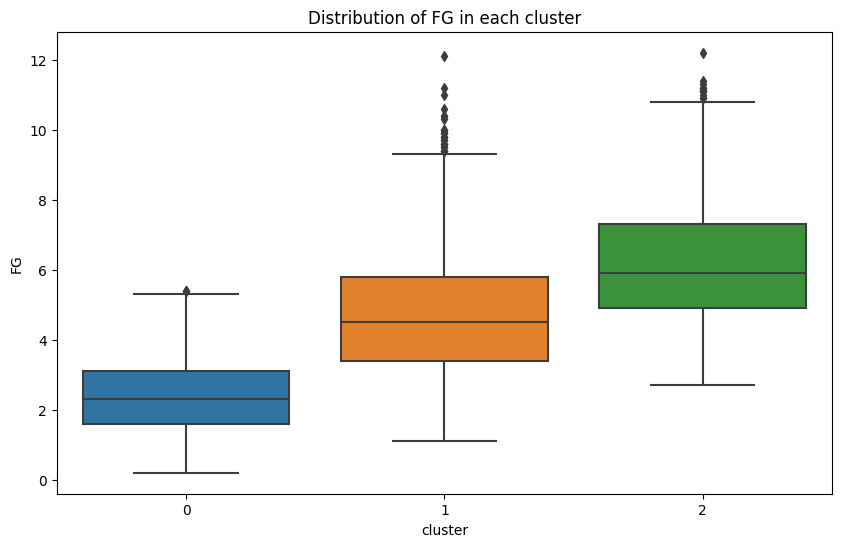

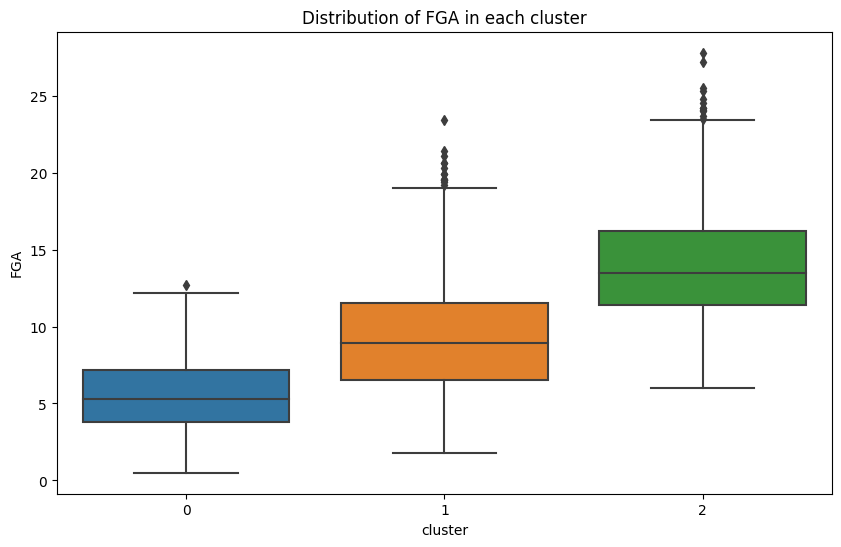

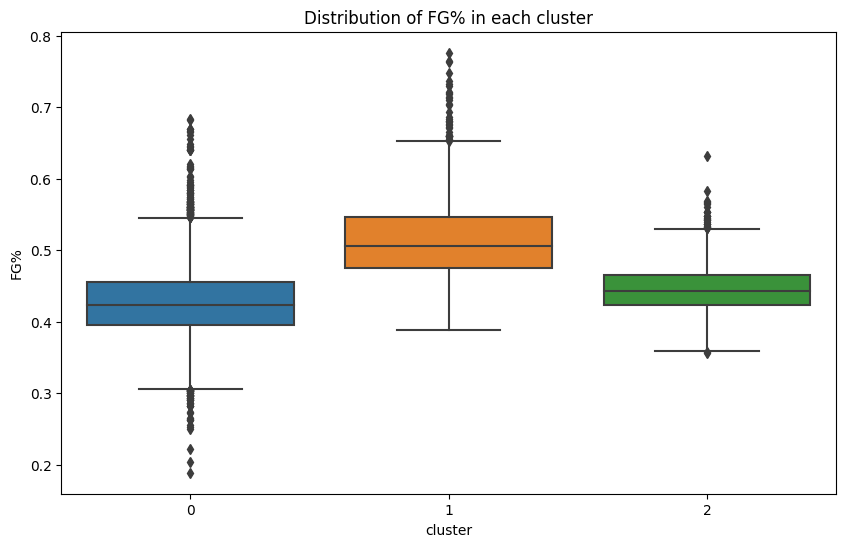

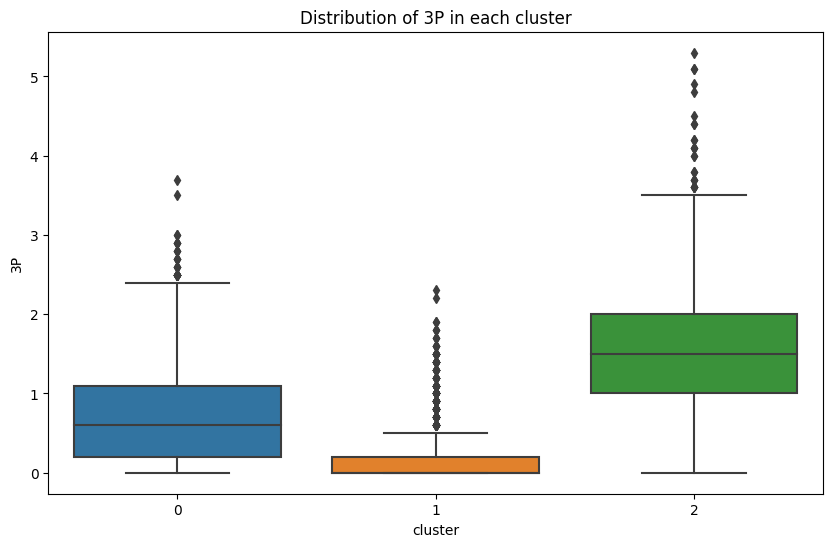

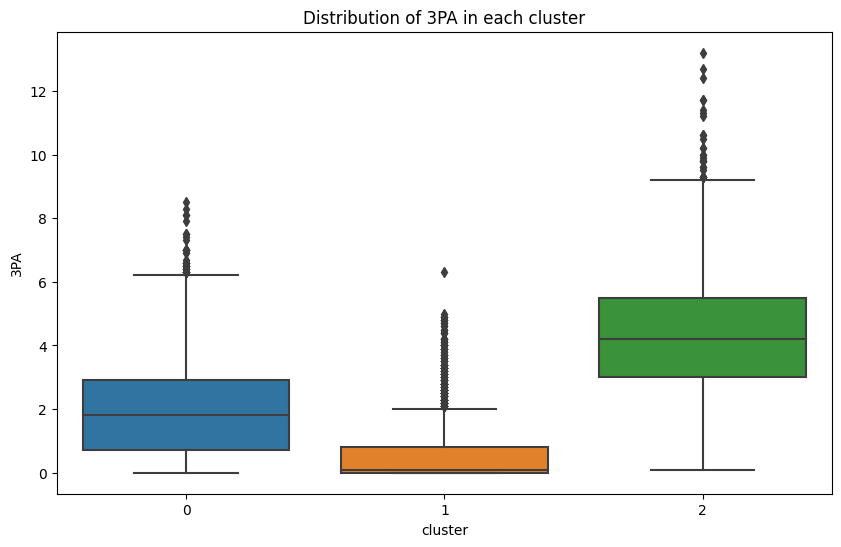

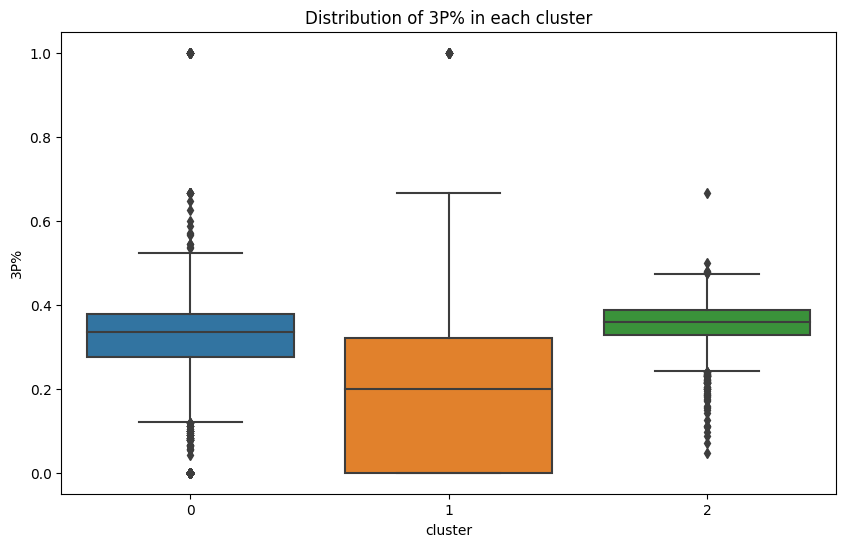

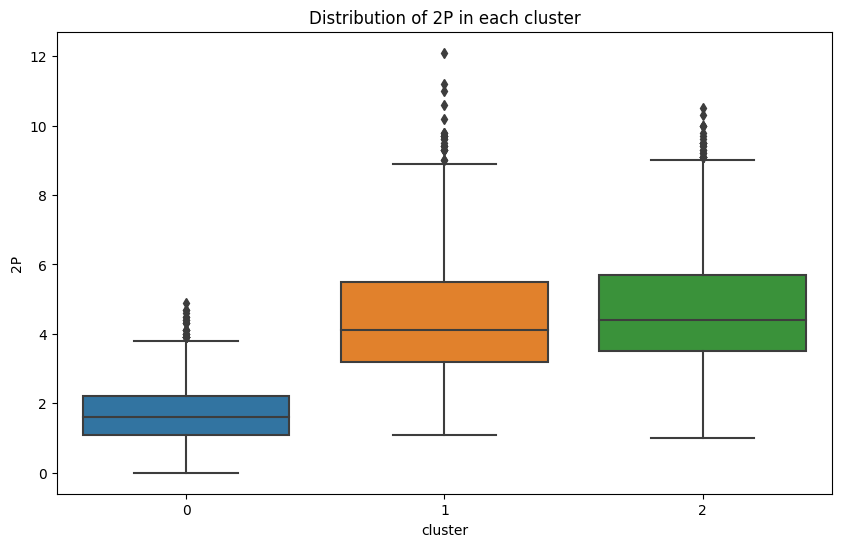

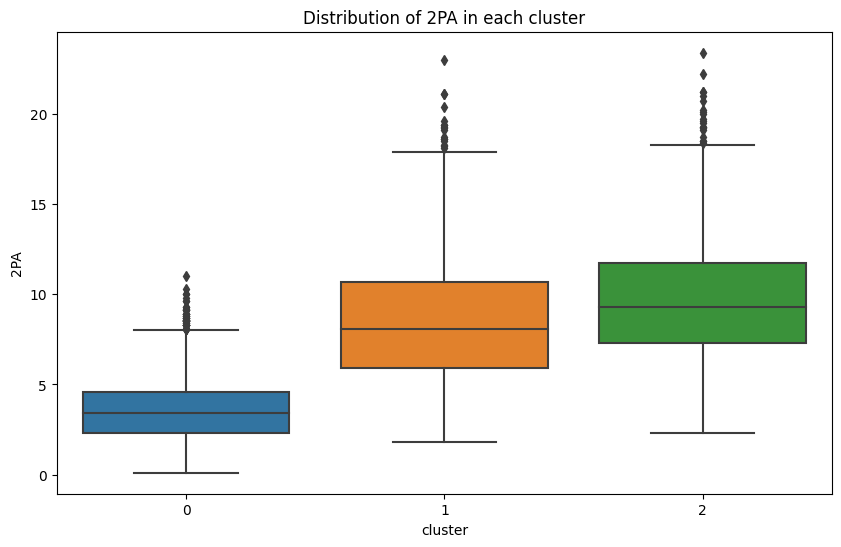

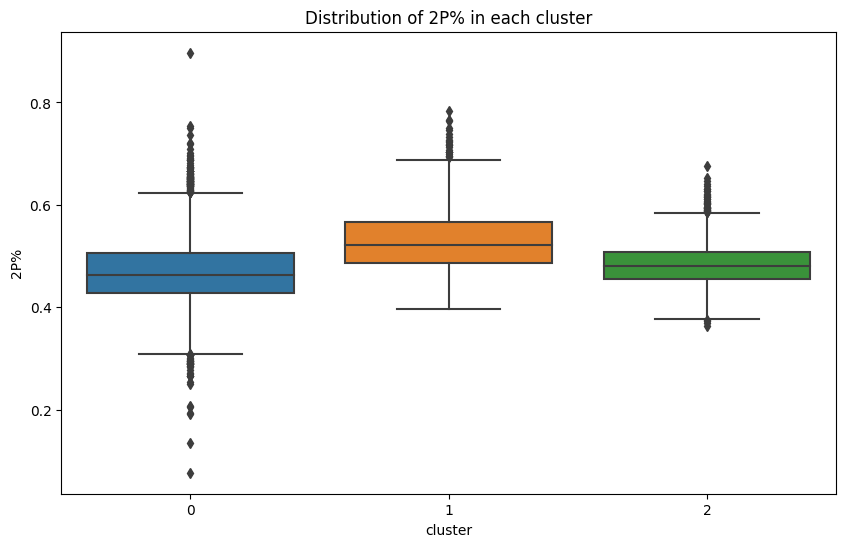

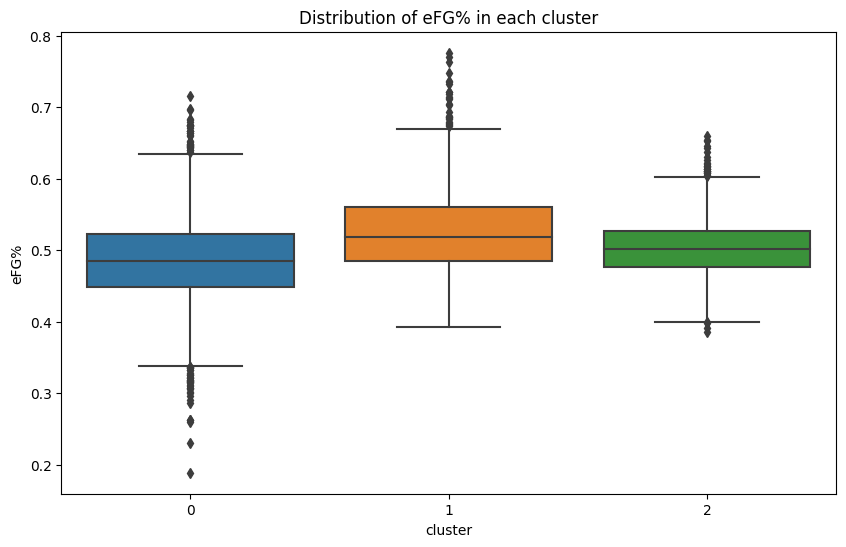

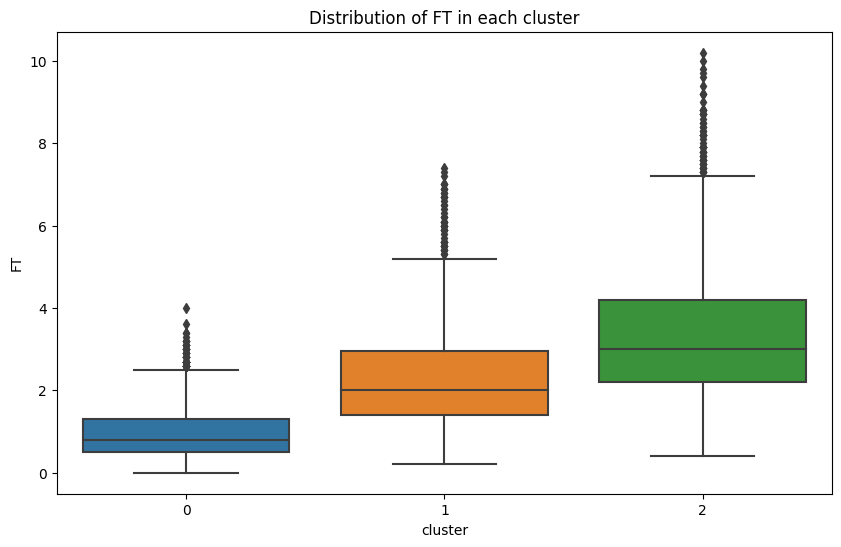

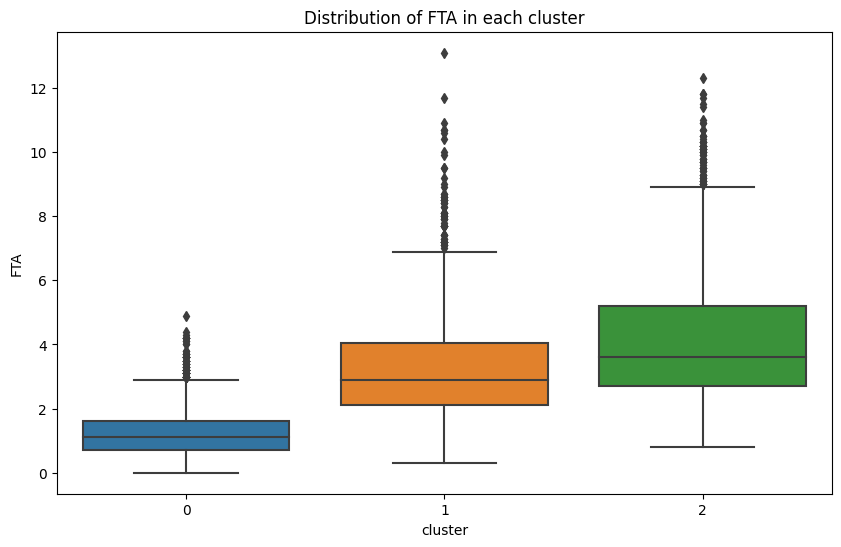

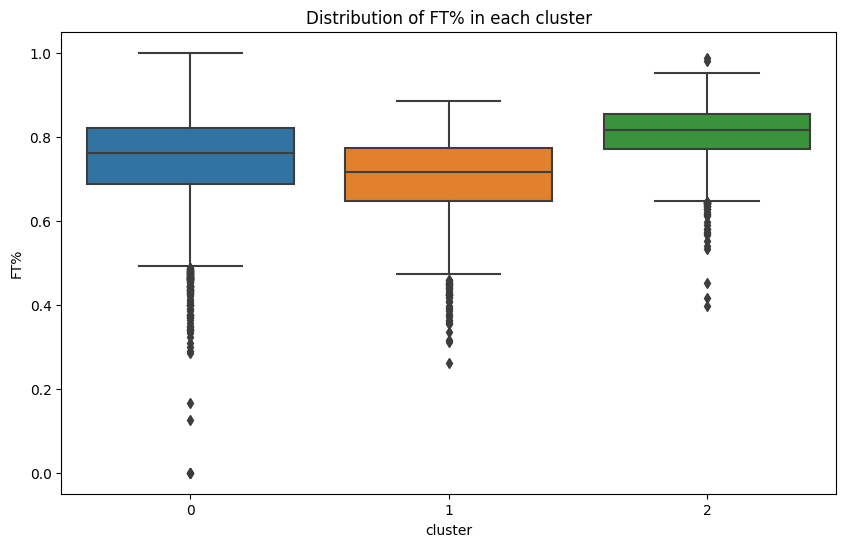

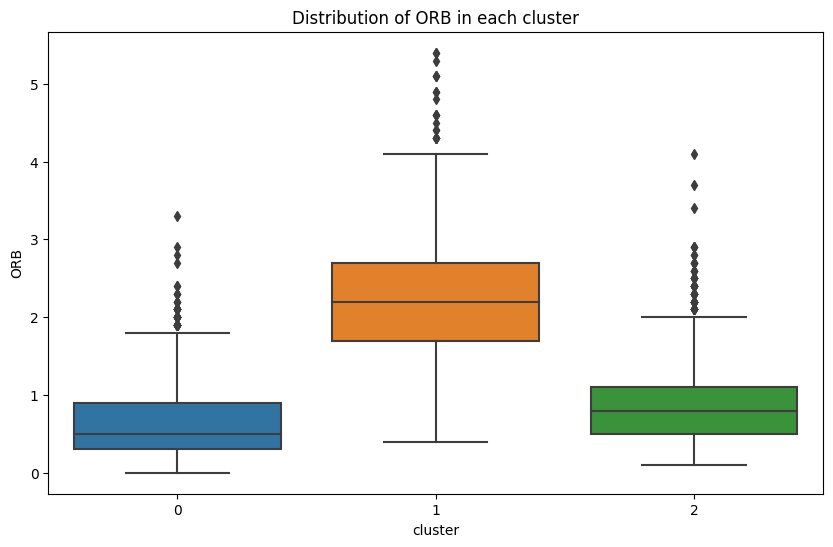

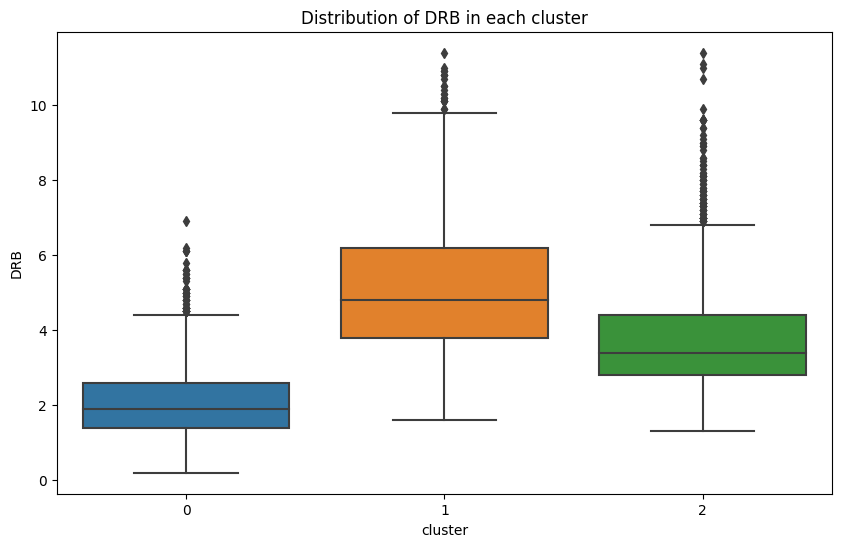

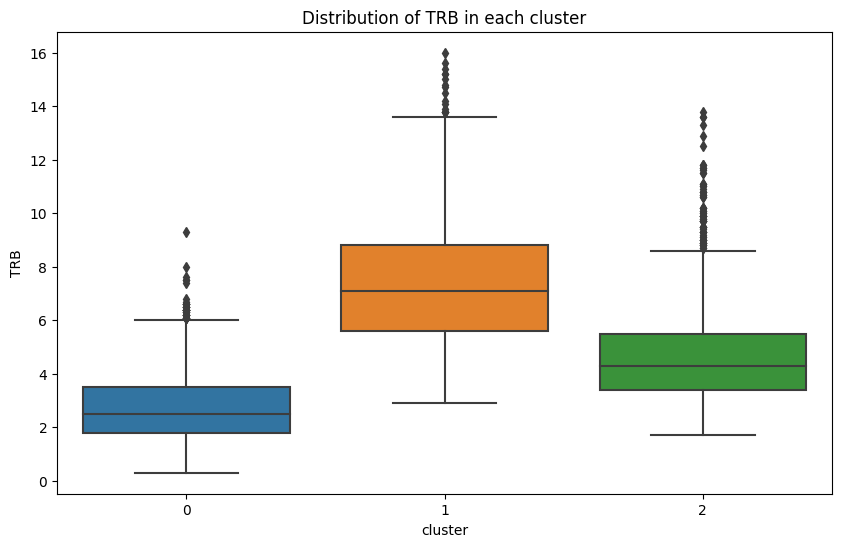

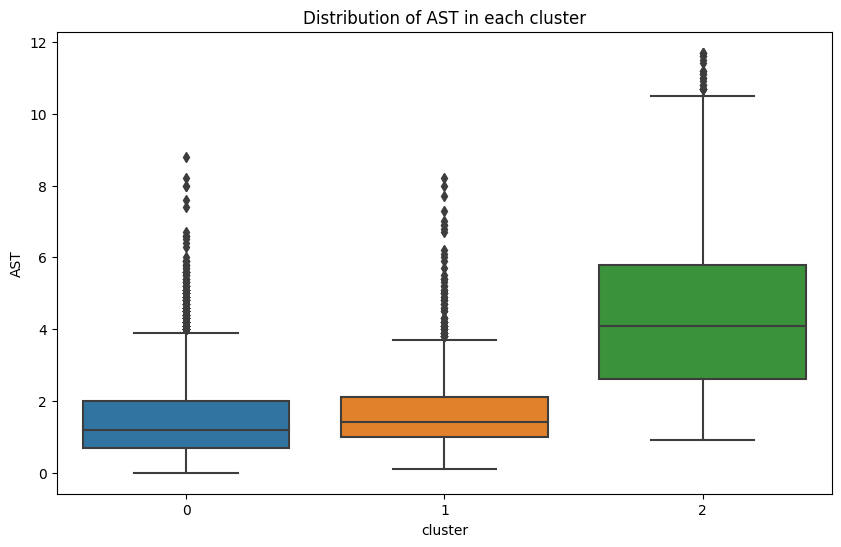

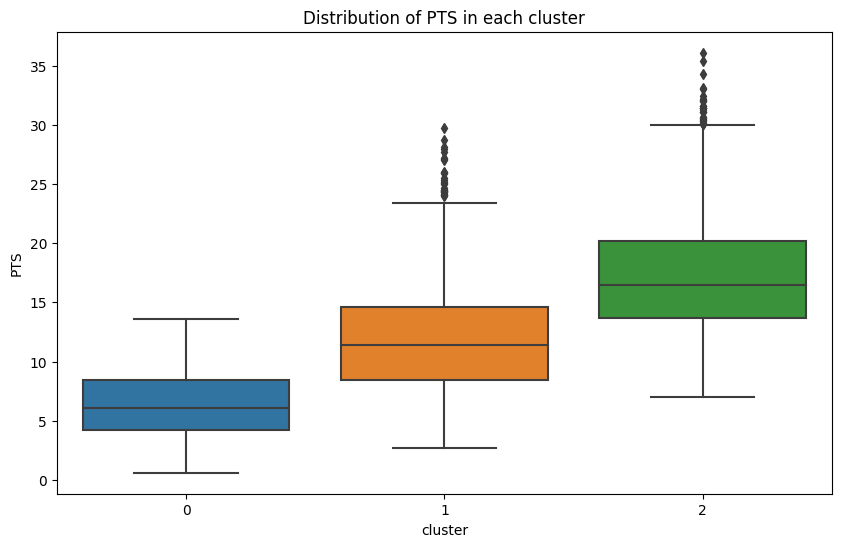

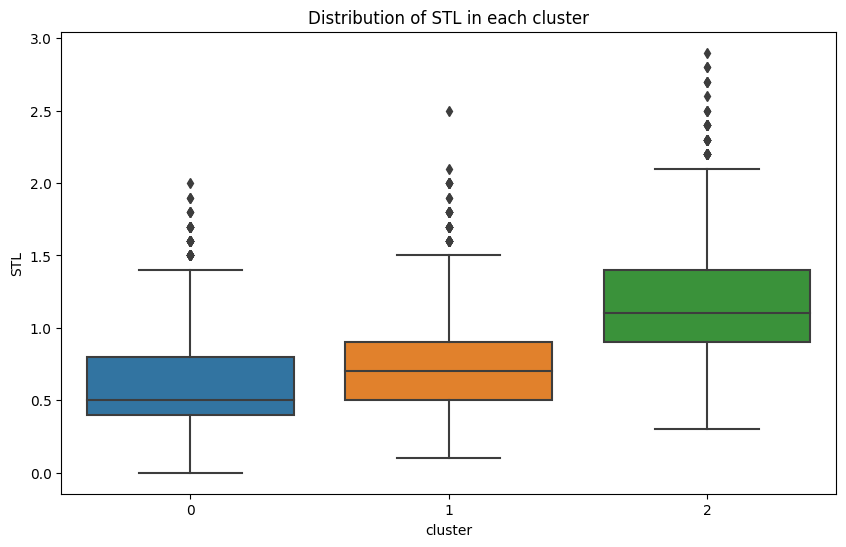

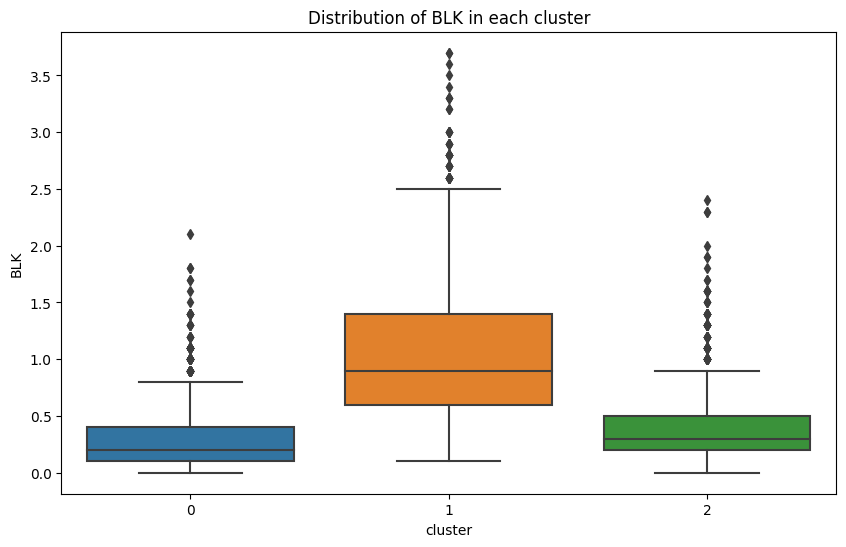

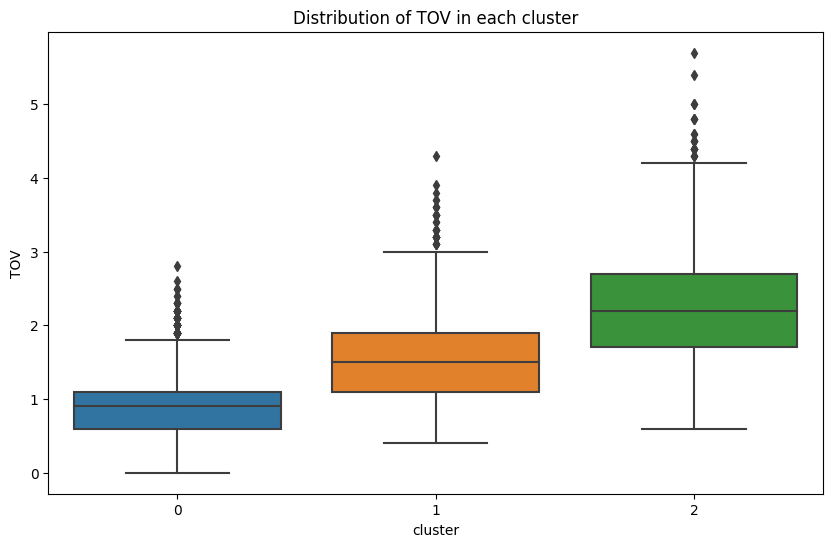

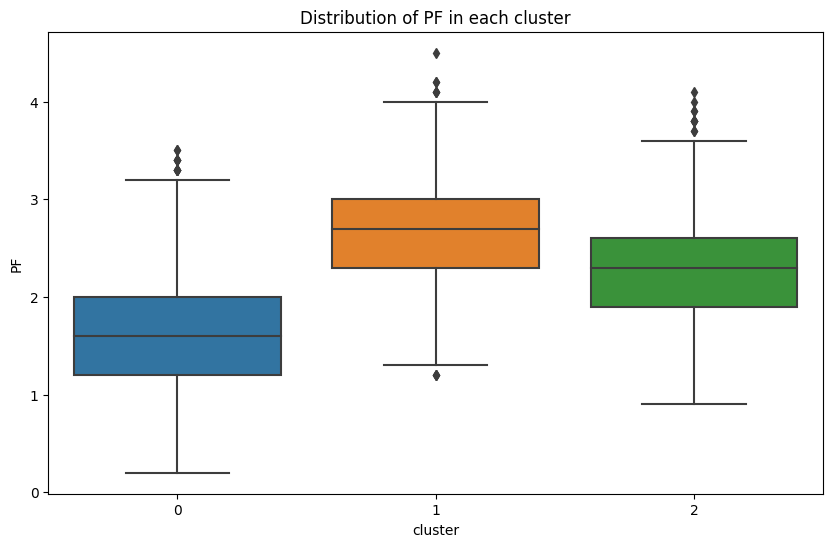

In [ ]:
centroids = model.cluster_centers_
for feature in X_train.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=df_nba)
    plt.title(f"Distribution of {feature} in each cluster")
    plt.show()

**Offensive Stats:** In the first two boxplots, we see an increasing number of FG and FGA attempts going from clusters 0 to 2. From here we obviously see one way how the model choose to cluster players. In the boxplot for FG%, cluster 1 has the highest FG%, which makes sense since bigmen typically have higher field goal percentages. For the offensive statistics, it was hard to see how the model would cluster a player into cluster 0 or cluster 2 if they were a guard or forward. We now see based off the boxplots that the players in cluster 0 typically shoot the ball less and score less than players in cluster 2. In other words, it seems to be that players in cluster 2 are more offensively dominant. I don't have the statistics on the time players held the ball, but based on this and the higher assists, it's likely that you can also define these players in cluster 2 as ball dominant. My predictions for the statistics in each group were pretty good for the offensive side of things.

**Defensive Stats:** As for the defensive statistics, I was spot on for cluster 1. The players in cluster 1 tended to have higher rebounds, and higher blocks. However, I was shocked to find that the players in cluster 0 typically had less steals and rebounds than cluster 2. This is because I feel since cluster 0 had more forwards, this would lead to them having more steals, as they are more typically in passing lanes, have longer wingspans, and more associated with a defensive prowess than guards are. This was not the case, as players in cluster two had higher steals, blocks, and rebounds.

Based off the distinct difference in statistics between the groups, as well as a mixture of different positions in each cluster from the cross tabulation, I would be heistant to say that these clusters matched correctly to guard, forward, and center roles. Instead, through our clustering, we seem to have defined three new types of positions.

# Rethinking Basketball Positions through Statistical Analysis

Let's revisit my research questions.
1. Can I predict a player's position based on their statistics?
2. Can I cluster players into positions based on their stats? And will this result in the same, or new positions?


---

In this project, I was able to develop a model that aims to predict an NBA player's position based of their statistics. I did this through a process of testing a variety of feature sets, different number of neighbors, different algorithms, and different ensemble models, including both stacking and voting. My final model demonstrated a moderate level of performance in predicting a player's position, with my precision, recall, and f1 scores all being above 0.6. However, despite the promising results, it is clear that there is still room for improvement. I'm sure there are other ways to refine my model to better capture the nuances of each position, whether by different features, or just more sophisticated modeling techniques.

From my clustering approach, my original question was would basketball statistics create clusters that would align with having positions defined as guards, forwards, and centers. Through building my model with K-means, I did not end up with clusters that showed this. Instead of aligning with this ideology of three positions, my clusters created what I would define to be as three new positions, a ball dominant player, an off-ball player, and a bigman. These names came to be through the careful analysis of the statistical profiles over the three groups, matching a player to a group based on that player's style of play. Ball dominant players tend to be players having high points, field goal attempts, assists, and turnovers. A bigman tend to have high blocks, rebounds, and poor three point shooting. Off-ball players tend to have lower shot attempts, but better three point shooting and free throw shooting than big-men.

With these new defined positions, we move beyond these traditional position labels, and shed light on the dynamic nature of modern basketball. The creation of these new positions not only challenge conventional wisdom, but can even open up strategic applications in team building and basketball strategy.

In [4]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [5]:
!jupyter nbconvert --to pdf /content/ExeSum.ipynb

[NbConvertApp] Converting notebook /content/ExeSum.ipynb to pdf
[NbConvertApp] Support files will be in ExeSum_files/
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./ExeSum_files
[NbConvertApp] Making directory ./Ex

In [8]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ExeSum.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y

'File Download Unsuccessful. Saved in Google Drive'